# Case Study: Growth

## Introduction

Company A is a popular photo editing product with millions of active users. The Growth Unit is responsible for expanding the user base, increasing user engagement, and retaining users. 
They are interested in understanding **user behavior and engagement** with its product. Below, a dataset containing user activity data was provided. Your task is to analyze this data and provide **actionable insights** and recommendations to **improve user growth and engagement**. 
In this task, you will be working with datasets that contain event logs and app open data for a specified period.

#### Part 1
1- Write a SQL query to derive the first session funnel per platform from the provided dataset using all available events. The first funnel step is the user’s first app open.
2- Calculate the WAU Growth Accounting (New, Retained, Resurrected, Churn users) from November 13th to November 19th
3- Write a SQL query to calculate the user’s daily retention rate for a 7-day period. Calculate both Sticky and Cohorted Retention

#### Part 2 
1- Please perform an analysis using the dataset provided. The goal is to find insights and suggest action(s) to stakeholders through your findings. Use Python, R, or a similar programming language to generate an analysis that could be shared/reviewed by other analysts.

Expected output: A memo in a form of Google doc that describes the finding and outlines action items. Additional attachments (spreadsheets, Jupyter notebooks, etc.) only if it is necessary

## Data Understanding and cleaning

#### App Open 
______________________________________________________

| Column        | Data Type         | Description                               | Unique Key|
| ----------- | ----------- | ----------- | ----------- |
| timestamp     |TIMESTAMP          |Timestamp when the app was opened          |No|
| device_skey   |STRING             |Unique identifier for the device           |No|
| session_skey  |STRING             |Unique identifier for the session          |No|
| user_skey     |STRING             |Unique identifier for the users            |No|
| is_first_app_open |BOOLEAN        |Indicator of whether it's the first time app open for the user |No|
| platform      |STRING             |Platform on which the app was opened (e.g., android, apple) |No|
| country_code  |STRING             |Country from which the app was opened (e.g., us, de) |No|

In [1]:
apps_open = _deepnote_execute_sql('SELECT \n    timestamp::TIMESTAMP_S AS date_time\n    , device_skey::VARCHAR AS device_skey\n    , session_skey::VARCHAR AS session_skey\n    , user_skey::VARCHAR AS user_skey\n    , is_first_app_open::BOOLEAN AS is_first_app_open\n    , platform::VARCHAR AS platform\n    , country_code::VARCHAR AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/App Opens.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
apps_open

,date_time,device_skey,session_skey,user_skey,is_first_app_open,platform,country_code
0,2023-11-08 02:07:19,7891415701568881512,2011583431778737851,-8717167265529084706,False,android,br
1,2023-11-08 06:26:35,2841158506866498595,-710585864896703953,3858142552250413010,False,android,vn
2,2023-11-08 11:00:09,8319180276841915965,8851130170214692120,-6901249382849255824,False,apple,vn
3,2023-11-08 17:03:55,-7044717482868540199,2562809385083234043,42,False,apple,vn
4,2023-11-08 10:09:35,8330275025360404105,6269721242185127990,-8100364697395241128,False,android,de
...,...,...,...,...,...,...,...
196085,2023-11-15 11:47:15,-1985881793666309748,1078423291596019483,3098934470375878848,False,android,br
196086,2023-11-15 15:24:53,2134527128238454256,-3747564580958942091,-8099055897267782491,False,apple,br
196087,2023-11-15 15:31:40,-2987017123302243105,-6832478710689874856,-8250782251817560378,False,android,vn
196088,2023-11-15 20:41:23,1438462127647457196,-5384106018072454101,-46678441358607097,False,android,br


#### Events
______________________________________________________


| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
event_name |STRING |Type of event occurred |No
timestamp |TIMESTAMP |Timestamp when the event occurred |No
event_skey |STRING |Unique identifier for the event |Yes
device_skey |STRING |Unique identifier for the device |No
user_skey |STRING |Unique identifier for the user |No
session_skey |STRING |Unique identifier for the session |No
platform |STRING |Platform on which the event occurred (e.g., android, apple) |No
source |STRING |Source screen from which the event was triggered |No
country_code |STRING |Country from which the app was opened (e.g., us, de) | No

In [2]:
events = _deepnote_execute_sql('SELECT \n    event_name::STRING AS event_name\n    , epoch_ms(timestamp)::TIMESTAMP_S AS date_time\n    , event_skey::STRING AS event_skey\n    , device_skey::STRING AS device_skey\n    , user_skey::STRING AS user_skey\n    , session_skey::STRING AS session_skey\n    , platform::STRING AS platform\n    , source::STRING AS source\n    , country_code::STRING AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/Events.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
events

,event_name,date_time,event_skey,device_skey,user_skey,session_skey,platform,source,country_code
0,registration_open,2023-11-11 03:32:05,-927509160255567445,-724186991312688217,null,5342905048311674142,apple,app_start,vn
1,registration_open,2023-11-11 03:16:02,6726005894254876970,167579040429311423,null,1033335939576521366,android,app_start,vn
2,registration_open,2023-11-10 15:18:40,-2921948449119298022,-753449636207296314,null,7698330632377898188,apple,app_start,vn
3,registration_open,2023-11-10 15:46:26,920368455108193822,6151555484025284746,null,1455590834684669000,android,user_profile,br
4,registration_open,2023-11-10 15:46:35,4301569710999595535,6151555484025284746,null,1455590834684669000,android,user_profile,br
...,...,...,...,...,...,...,...,...,...
762098,object_export,2023-11-06 03:19:28,8762455078106490544,-218442561903040844,-7394739150698595004,4931081474184387585,apple,editor_screen,vn
762099,object_export,2023-11-06 03:19:33,1236197224848669172,-8953068508614011099,-5616148740068329164,1939940093157332532,apple,editor_add_objects,vn
762100,object_export,2023-11-06 00:40:15,-1128268909705829967,7622198276030932501,-4476277103857062859,-914698409805777184,apple,share_screen,br
762101,object_export,2023-11-06 03:46:08,-5041445763328466000,-2972284481220770541,5642301744160861251,-2767914012090684930,android,editor_add_objects,eg


#### Visitors
______________________________________________________

| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
|Date |STRING| Date of visit | yes
Store Visitors. Source: search | BIGINT |Number of store visitors from the source search |No
Store Visitors. Source: explore | BIGINT |Number of store visitors from the source explore |No
Store Visitors. Source: referrals | BIGINT |Number of store visitors from the source referrals |No

In [3]:
visitors = _deepnote_execute_sql('SELECT \n    Date::TIMESTAMP_S AS date_time\n    , "Store Visitors. Source: search"::BIGINT AS store_visitors_source_search\n    , "Store Visitors. Source: explore"::BIGINT AS store_visitors_source_explore\n    , "Store Visitors. Source: referrals"::BIGINT AS store_visitors_source_referrals\nFROM \'ps_challanges/growth_case_study/Datasets/store_visitors.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
visitors

,date_time,store_visitors_source_search,store_visitors_source_explore,store_visitors_source_referrals
0,2023-11-01,6,6,5
1,2023-11-02,7,8,7
2,2023-11-03,3,3,2
3,2023-11-04,286,3,3
4,2023-11-05,7,9,6
5,2023-11-06,2,4,2
6,2023-11-07,4,7,4
7,2023-11-08,1,3,2
8,2023-11-09,6,12,6
9,2023-11-10,8,15,7


## Part 1 - SQL

> 1- Write an SQL query to derive the first session funnel per platform from the provided dataset using all available events. The first funnel step is the user’s first app open.

In [4]:
ranked = _deepnote_execute_sql('WITH base AS (\n    SELECT \n      events.date_time\n      , events.user_skey\n      , events.platform\n      , events.session_skey\n      , events.event_name\n    FROM events \n    INNER JOIN apps_open USING(session_skey)\n)\n, ranked as (\n    SELECT     \n    session_skey\n    , user_skey\n    , platform\n    , event_name\n    , RANK() OVER (PARTITION BY session_skey ORDER BY date_time) AS funnel_step\n    FROM base\n)\n, ordered AS (SELECT \n     funnel_step\n    , event_name\n    , COUNT(DISTINCT CASE WHEN platform = \'apple\' THEN user_skey END) AS apple\n    , COUNT(DISTINCT CASE WHEN platform = \'android\' THEN user_skey END) AS android\nFROM ranked\nGROUP BY funnel_step, event_name\n)\n\n-- SELECT * FROM ordered\n\nSELECT DISTINCT\n    funnel_step\n    , FIRST(CONCAT(event_name, \': \', apple, \' users\')) OVER (PARTITION BY funnel_step ORDER BY apple desc) AS apple_event \n    , FIRST(CONCAT(event_name, \': \', android, \' users\')) OVER (PARTITION BY funnel_step ORDER BY android desc) AS android_event\nFROM ordered\nWHERE funnel_step <= 5\nORDER BY funnel_step ASC', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
ranked

,funnel_step,apple_event,android_event
0,1,create_flow_open: 203 users,create_flow_open: 226 users
1,2,subscription_offer_open: 95 users,editor_open: 127 users
2,3,editor_open: 113 users,object_export: 89 users
3,4,object_export: 81 users,object_export: 70 users
4,5,object_export: 42 users,object_export: 45 users


> 2. Calculate the WAU Growth Accounting (New, Retained, Resurrected, Churn users) from November 13th to November 19th

1. New Users: Users who start using the application during the current week.
2. Retained Users: Users who also used the application in the current week and the week before.
3. Resurrected Users: Users who used the app in the current week, but not the previous week, and at some point before the previous week.
4. Churned Users: Users who used the app in the previous week, but not the current week.

In [5]:
base_users = _deepnote_execute_sql('WITH  base AS (\nSELECT \n    date_trunc(\'week\', date_time) AS week\n    , user_skey\n    , is_first_app_open\nFROM apps_open\n) \n\n, normalized AS (\n    SELECT \n        user_skey\n        , CASE WHEN week = \'2023-11-06\' AND is_first_app_open = TRUE THEN \'new_week_1\'\n            WHEN week = \'2023-11-06\' AND is_first_app_open = FALSE THEN \'existing_week_1\'\n            WHEN week = \'2023-11-13\' AND is_first_app_open = TRUE THEN \'new_week_2\'\n            WHEN week = \'2023-11-13\' AND is_first_app_open = FALSE THEN \'existing_week_2\' END AS category \n    FROM base\n)\n\n, pivoted AS (PIVOT normalized ON category USING COUNT(DISTINCT user_skey) GROUP BY user_skey)\n\n, final AS (\nSELECT DISTINCT\n *\n    , CASE WHEN new_week_1 = 1 THEN \'new\'\n        WHEN existing_week_1 = 1 THEN \'existing\' END AS week_1\n    , CASE WHEN new_week_2 = 1  AND new_week_1 = 0 THEN \'new\'\n        WHEN existing_week_2 = 1 THEN \'existing\' END AS week_2\nFROM pivoted \n)\n\n    SELECT \n      COUNT(DISTINCT CASE WHEN week_1 = \'new\' THEN user_skey END) AS new_week_1\n      , COUNT( DISTINCT CASE WHEN week_2 = \'new\' THEN user_skey END) AS new_week_2\n\n      , COUNT( DISTINCT CASE WHEN week_1 = \'existing\' THEN user_skey END) AS existing_week_1\n      , COUNT( DISTINCT CASE WHEN week_2 = \'existing\' THEN user_skey END) AS existing_week_2\n\n      , COUNT( DISTINCT CASE WHEN week_1 IS NOT NULL THEN user_skey END) AS total_week_1\n      , COUNT( DISTINCT CASE WHEN week_2 IS NOT NULL THEN user_skey END) AS total_week_2\n\n      , ((total_week_2/total_week_1 -1) * 100)::DECIMAL(10,2) AS growth\n      , COUNT( DISTINCT CASE WHEN week_1 IS NULL AND week_2 = \'existing\' THEN user_skey END) AS resurrected\n      , COUNT( DISTINCT CASE WHEN week_1 IS NOT NULL AND week_2 = \'existing\' THEN user_skey END) AS retained\n      , COUNT( DISTINCT CASE WHEN week_1 IS NOT NULL AND week_2 IS NULL THEN user_skey END) AS churned\n    FROM final', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
base_users

,new_week_1,new_week_2,existing_week_1,existing_week_2,total_week_1,total_week_2,growth,resurrected,retained,churned
0,2,1,68070,69412,68072,69413,1.97,67441,1971,66101


> 3. Write a SQL query to calculate the user’s daily retention rate for 7 days. Calculate both Sticky and Cohorted Retention

Retention rate is a measure of how many users return to the app after their first visit. 
- Cohorted Retention: This looks at users who started using the application on a specific date, then checks to see if they're still using the app after a certain number of days.
- Sticky Retention: This is a measure of how often the user is engaged with the app (usually on a daily or monthly basis). It's calculated by dividing the Daily Active Users (DAU) by the Monthly/Week Active Users (M/WAU).

In [6]:
cohort = _deepnote_execute_sql('WITH cohorts AS (\n    SELECT\n        apps_open.user_skey,\n        DATE_TRUNC(\'day\', MIN(apps_open.date_time)) AS start_date\n    FROM apps_open\n    WHERE date_time > \'2023-11-07\'\n    GROUP BY 1\n)\n\n, cohort AS (\n    SELECT\n        start_date\n        , \'day\' AS beginning\n        , date_diff(\'day\', start_date, DATE_TRUNC(\'day\', date_time)) AS cohort_date\n        , COUNT(DISTINCT user_skey) AS total_users\n    FROM apps_open\n    JOIN cohorts USING (user_skey)\n    GROUP BY 1,2,3\n)\n\n,pivoted AS (\nPIVOT (SELECT * FROM cohort WHERE cohort_date <= 7) \n    ON beginning,cohort_date USING SUM(total_users)\n)\n\nSELECT \n    start_date\n        , day_1\n        , (day_2/day_1 * 100)::DECIMAL(10,2) || \'%\' AS retention_rate_day_2\n        , (day_3/day_1 * 100)::DECIMAL(10,2) || \'%\' AS retention_rate_day_3\n        , (day_4/day_1 * 100)::DECIMAL(10,2) || \'%\' AS retention_rate_day_4\n        , (day_5/day_1 * 100)::DECIMAL(10,2) || \'%\' AS retention_rate_day_5\n        , (day_6/day_1 * 100)::DECIMAL(10,2) || \'%\' AS retention_rate_day_6\n        , (day_7/day_1 * 100)::DECIMAL(10,2) || \'%\' AS retention_rate_day_7\nFROM pivoted\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
cohort

,start_date,day_1,retention_rate_day_2,retention_rate_day_3,retention_rate_day_4,retention_rate_day_5,retention_rate_day_6,retention_rate_day_7
0,2023-11-08,70.0,74.29%,47.14%,68.57%,48.57%,67.14%,71.43%
1,2023-11-07,76.0,80.26%,80.26%,59.21%,60.53%,64.47%,68.42%
2,2023-11-12,64.0,82.81%,46.88%,73.44%,62.50%,79.69%,68.75%
3,2023-11-10,53.0,94.34%,86.79%,86.79%,83.02%,101.89%,71.70%
4,2023-11-11,62.0,87.10%,62.90%,80.65%,75.81%,66.13%,91.94%
5,2023-11-09,56.0,64.29%,96.43%,64.29%,85.71%,60.71%,91.07%
6,2023-11-17,52.0,75.00%,None,None,None,None,None
7,2023-11-14,52.0,73.08%,101.92%,88.46%,67.31%,None,None
8,2023-11-19,NaN,None,None,None,None,None,None
9,2023-11-16,44.0,90.91%,95.45%,None,None,None,None


In [7]:
stickiness = _deepnote_execute_sql('WITH daily_users AS (\n    SELECT \n        DATE_TRUNC(\'day\', date_time) AS day,\n        COUNT(DISTINCT user_skey) AS dau\n    FROM events\n    GROUP BY 1\n),\n\nweekly_users AS (\n    SELECT\n        DATE_TRUNC(\'week\', date_time) AS week,\n        COUNT(DISTINCT user_skey) AS wau\n    FROM events\n    GROUP BY 1\n)\n\nSELECT\n    week,\n    (AVG(dau) / wau *100)::DECIMAL(10,5) || \' %\'AS sticky_retention\nFROM daily_users\nJOIN weekly_users ON DATE_TRUNC(\'week\', day) = week\nGROUP BY week, wau', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
stickiness

,week,sticky_retention
0,2023-11-06,14.51583 %
1,2023-11-13,14.51684 %


## Part 2 - User Activity Analysis

> Please perform an analysis using the dataset provided. The goal is to find insights and suggest action(s) to stakeholders through your findings. Use Python, R, or a similar programming language to generate an analysis that could be shared/reviewed by other analysts.

#### Analysis focus:

**1. Daily unique users:** Help us understand the daily user engagement, trends and behaviors in the app.

**2. User tendencies over platforms:** Evaluate the proportion of users on different platforms (Apple vs Android).
> - This analysis can offer a better understanding of user preferences and could guide developers in optimizing the  app experience for particular platforms.
> - It can help guide the development team to tailor their work to the preference of majority users.
> - Distinguishing and understanding user preferences across different platforms can help guide the development team > tailor their work to the preference of majority users.

**3. Day of the week influence:** Identifying fluctuations of user engagement throughout the week can assist in timely and targeted marketing campaigns.

**4. Time spent on the app:** Evaluate the time spent on the app across different platforms and provide insights on how to improve the user experience.

#### Insights:

- Promotions or campaigns can be timed to periods of low user engagement to boost usage during these times.
- If the majority of users prefer one platform over another, consider focusing on enhancing the user experience on that platform.
- Use engagement patterns to inform future feature developments, updates, and bug fixes.

### Daily unique users

In [8]:
import pandas as pd

apps_open_df = apps_open
apps_open_df['date_time'] = pd.to_datetime(apps_open_df['date_time'])
apps_open_df['date_time'] = apps_open_df['date_time'].dt.date

unique_users_per_day = (apps_open_df.groupby(["date_time", "platform"])["user_skey"].nunique().unstack(level=-1).reset_index())
unique_users_per_day['android_proportion'] = unique_users_per_day['android'] / (unique_users_per_day['apple'] + unique_users_per_day['android']) * 100
unique_users_per_day['apple_proportion'] = 100 - unique_users_per_day['android_proportion'] 

In [9]:
import plotly.subplots as sp
import plotly.express as px

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Number of Daily Active Users by Platform", "Proportion of users per day per platform"), vertical_spacing=0.05)

fig1 = px.line(unique_users_per_day, x='date_time', y=['android', 'apple'])
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig1['data'][1], row=1, col=1)

fig2 = px.area(unique_users_per_day, x='date_time', y=['android_proportion', 'apple_proportion'], title='Proportion of users per day per platform')
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig2['data'][1], row=1, col=2)

fig.update_layout(height=350, width=900, showlegend=False)
fig.show()

In [10]:
unique_users_per_day['date_time'] = pd.to_datetime(unique_users_per_day['date_time'])
unique_users_per_day['day'] = unique_users_per_day['date_time'].dt.strftime('%d/%m')
unique_users_per_day['weekday'] = unique_users_per_day['date_time'].dt.strftime('%a')
unique_users_per_day['week_number'] = unique_users_per_day['date_time'].dt.isocalendar().week
unique_users_per_day

platform,date_time,android,apple,android_proportion,apple_proportion,day,weekday,week_number
0,2023-11-06,5192,4189,55.345912,44.654088,06/11,Mon,45
1,2023-11-07,5320,4183,55.982321,44.017679,07/11,Tue,45
2,2023-11-08,5385,4234,55.982950,44.017050,08/11,Wed,45
3,2023-11-09,5541,4113,57.395898,42.604102,09/11,Thu,45
4,2023-11-10,5545,4374,55.902813,44.097187,10/11,Fri,45
5,2023-11-11,5856,4586,56.081210,43.918790,11/11,Sat,45
6,2023-11-12,6018,4619,56.576102,43.423898,12/11,Sun,45
7,2023-11-13,5499,4425,55.411125,44.588875,13/11,Mon,46
8,2023-11-14,5243,4009,56.668828,43.331172,14/11,Tue,46
9,2023-11-15,5435,4209,56.356284,43.643716,15/11,Wed,46


In [11]:
import plotly.express as px

days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
unique_users_per_day['total'] = unique_users_per_day['android'] + unique_users_per_day['apple']
pivot_df = unique_users_per_day.pivot(index='weekday', columns='week_number', values='total')
pivot_df = pivot_df.reindex(days_order)
pivot_df.rename(columns={ 45: 'week_1', 46: 'week_2'}, inplace=True)

pivot_df['week_1_growth'] = (pivot_df['week_1']/pivot_df['week_1'].shift(1))*100
pivot_df['week_2_growth'] = (pivot_df['week_2']/pivot_df['week_2'].shift(1))*100
pivot_df

week_number,week_1,week_2,week_1_growth,week_2_growth
weekday,,,,
Mon,9381,9924,NaN,NaN
Tue,9503,9252,101.300501,93.228537
Wed,9619,9644,101.220667,104.236922
Thu,9654,9955,100.363863,103.224803
Fri,9919,10421,102.744976,104.681065
Sat,10442,10471,105.272709,100.479800
Sun,10637,10853,101.867458,103.648171


My apologies for the confusion, it seems I made a wrong assumption that `apps_open_df` was a pre-loaded DataFrame in this environment based on my interpretion of the previous error messages. 

It seems like we might be missing some initial steps here. To provide a meaningful visualization, we would require the DataFrame with the user data and their activity by weeks.

Usually it involves steps like these:

1. Load the dataset from a CSV file or database into a DataFrame.
2. Transform the timestamp into a datetime format that Python could understand.
3. Extract the date and weekday information from the timestamp.
4. Group by date, platform, and weekday, then count the unique users.

Could you help by providing the dataset or any pre-existing DataFrame we can use for the analysis?

In [12]:
unique_users_per_day.describe()[['android', 'apple']].round(2)

platform,android,apple
count,14.00,14.00
mean,5626.21,4350.57
std,314.96,203.96
min,5192.00,4009.00
25%,5397.50,4194.00
50%,5543.00,4337.00
75%,5878.50,4519.75
max,6195.00,4658.00


#### Observations

- The standard deviation (a measure of the variability of a set of values) is higher for Android (314.96) compared to Apple (203.96). A higher standard deviation means that the number of daily unique users varies more from day to day on Android than on Apple. 
- The minimum and maximum number of daily unique users are also both higher on Android compared to Apple. 

- The proportion of users on Android and Apple platforms remain relatively consistent over time, with Android consistently having a higher proportion of users (around 56%) compared to Apple (around 44%).
- There does not seem to be any significant fluctuations or upward/downward trends in the proportions over the time period observed.

--------------------

 #### Insights:

- The consistency in the proportion of users across different platforms suggests that user behavior and preferences remain stable over time. 

- The higher proportion of Android users indicates that the app is more popular among Android users. This could be due to various reasons such as user experience, app performance, and availability of features.

#### Suggestions:

- While the current user base is more Android-heavy, it is also crucial to not overlook the Apple user base. Dedicating resources on both platforms could improve user experience and potentially draw in more users.

- Given the stable proportion of Android and Apple users, the development team could focus on improving the app’s features and performance on both platforms rather than prioritizing one over another.

- Running promotional campaigns or introducing new features could potentially shift the proportion and increase user base on both platforms. It would be helpful to monitor changes in the proportion, especially after making significant updates to the app.

Next, I will proceed to analyze the average length of user sessions across both platforms based on the `session_lengths` DataFrame. This could provide valuable insights into user engagement. Let's compute the descriptive statistics (mean, min, max, etc) of the session lengths for each platform. I'll also generate box plots to visualize the distribution of session lengths.

NameError: name 'sns' is not defined

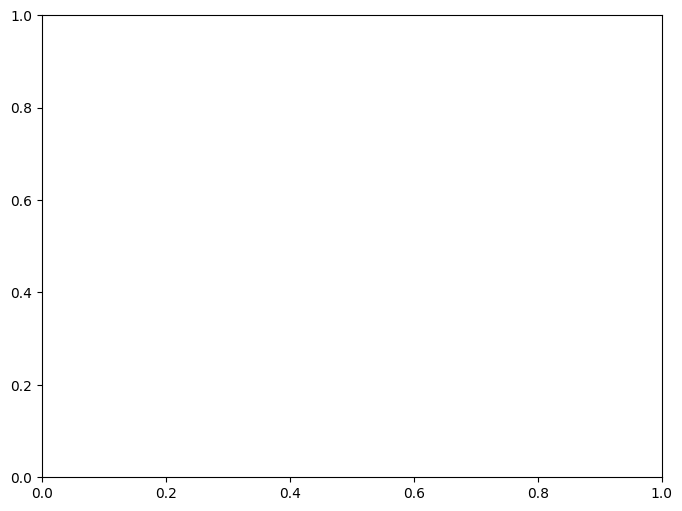

In [13]:
# Import necessary library
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw a boxplot for session lengths of each platform
sns.boxplot(ax=ax, x='platform', y='length_minutes', data=session_lengths, showfliers = False)

# Setting plot title
ax.set_title('Boxplot of Session Lengths by Platform')

# Showing the plot
plt.show()

In [ ]:
session_lengths = events.groupby(['session_skey','user_skey', 'platform'])['date_time'].agg(['min', 'max'])
session_lengths['length_minutes'] = (session_lengths['max'] - session_lengths['min']).dt.total_seconds()/60
session_lengths.reset_index(inplace=True)
print("In-app time spent: ") 
session_lengths.groupby('platform')['length_minutes'].describe( ).round(3)

In-app time spent: 


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
android,106763.0,3.376,10.928,0.0,0.1,1.050,3.817,2869.733
apple,65332.0,3.309,15.945,0.0,0.1,1.033,3.533,2785.383


#### In-app times spent

Related to time spent in-app per session, both platforms have similar time, with Android having a slightly higher average and median.

#### A more detailed analysis can be performed:

1. **Distribution and Outliers**: High session lengths with a low amount of events could represent users who leave the app open without interacting with it, while low session lengths might indicate issues that cause users to leave the > app early. 
    > A feature could be introduced to confirm if the user is still active, or the app could automatically close or pause after a certain period of inactivity to save resources. 
    > If session lengths are consistently low for either platform, this suggests an issue that affects user experience. More in-depth user behavior analytics or user feedback could help identify any problem areas or bugs that need to be addressed.

2. **Compare Platforms**: If there are significant differences, this could highlight platform-specific issues or usage patterns.

3. **Trends Over Time**: Evaluate if there are any trends or changes in session length over time. This can provide insights into the impact of updates or changes to the app. 

4. **Correlation with Other Factors**: Analyze if session length correlates with other factors like particular events or sources of visitors.

#### Actionable suggestions:
=====================
1. **Investigate High Session Lengths**: If there are users who have high session lengths with minimal events, the app could introduce a feature to confirm if the user is still active or to automatically pause/close after a certain period of inactivity. This could save server resources and offer a better user experience.

2. **Investigate Low Session Lengths**: If there are users who consistently have low session lengths, this could indicate a problem with the user experience. User feedback or further analysis could help identify any potential issues or bugs that need to be addressed.

3. **Observe Changes Over Time**: If there are noticeable changes in session length over time following updates or changes to the app, this could inform the impact and success of these changes. For example, if session length increases following a new feature launch, this could suggest the feature was well-received.

4. **Correlation with Other Factors**: If session length correlates with specific events or visitor sources, this can inform user acquisition strategy. For example, if users coming from a certain source tend to have longer sessions, it might be worth investing more in that acquisition channel.



In [ ]:
session_lengths = events.groupby(['session_skey','user_skey', 'platform'])['date_time'].agg(['min', 'max'])
session_lengths['length_minutes'] = (session_lengths['max'] - session_lengths['min']).dt.total_seconds()/60
session_lengths.reset_index(inplace=True)
print("In-app time spent: ") 
session_lengths.groupby('platform')['length_minutes'].describe( ).round(3)

In-app time spent: 


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
android,106763.0,3.376,10.928,0.0,0.1,1.050,3.817,2869.733
apple,65332.0,3.309,15.945,0.0,0.1,1.033,3.533,2785.383


#### In-app times spent
Related to time spent in-app per session, both platforms have similar time, with Android having a slightly higher average and median.

1. Distribution and Outliers: High session lengths with a low amount of events could represent users who leave the app open without interacting with it, while low session lengths might indicate issues that cause users to leave the > app early. 
    > A feature could be introduced to confirm if the user is still active, or the app could automatically close or pause after a certain period of inactivity to save resources. 
    > If session lengths are consistently low for either platform, this suggests an issue that affects user experience. More in-depth user behavior analytics or user feedback could help identify any problem areas or bugs that need to be addressed.

2. Compare Platforms: If there are significant differences, this could highlight platform-specific issues or usage patterns.

3. Trends Over Time: Evaluate if there are any trends or changes in session length over time. This can provide insights into the impact of updates or changes to the app. 

4. Correlation with Other Factors: Analyze if session length correlates with other factors like particular events or sources of visitors.

Actionable suggestions:
=====================
If there are noticeable changes in session length over time following updates or changes to the app, this could inform the impact and success of these changes. For example, if session length increases following a new feature launch, this could suggest the feature was well-received.

4. If session length correlates with specific events or visitor sources, this can inform user acquisition strategy. For example, if users coming from a certain source tend to have longer sessions, it might be worth investing more in that acquisition channel.

Let's proceed with this analysis.

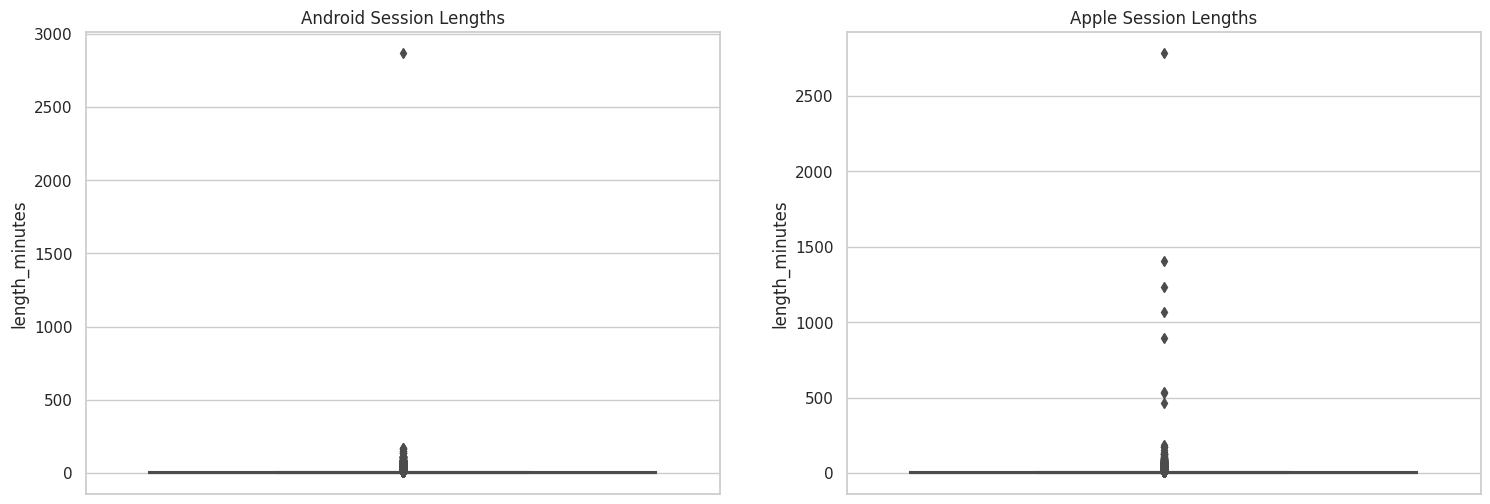

In [ ]:
# Import necessary library
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for Android
sns.boxplot(ax=axes[0], y="length_minutes", data=session_lengths[session_lengths["platform"] == "android"]).set_title('Android Session Lengths')

# Boxplot for Apple
sns.boxplot(ax=axes[1], y="length_minutes", data=session_lengths[session_lengths["platform"] == "apple"]).set_title('Apple Session Lengths')

# Show the plot
plt.show()

Here, I plotted two boxplots representing the distribution of session lengths for Android and Apple users. Outliers are displayed as points above and below the boxplot.

From the plots, we observe that:

1. The majority of sessions for both Android and Apple users are quite short, with most sessions being under 20 minutes. However, there are a significant number of outliers stretching as long as approximately 2900 minutes or about 48 hours.

2. This suggests that majority of users engage with the app for short periods, but there are also users who keep the app open for extended periods, possibly even leaving it open in the background unintentionally.

To evaluate more granular session length patterns and any potential change across different times, we should also investigate session length variation over time.

KeyError: 'platform'

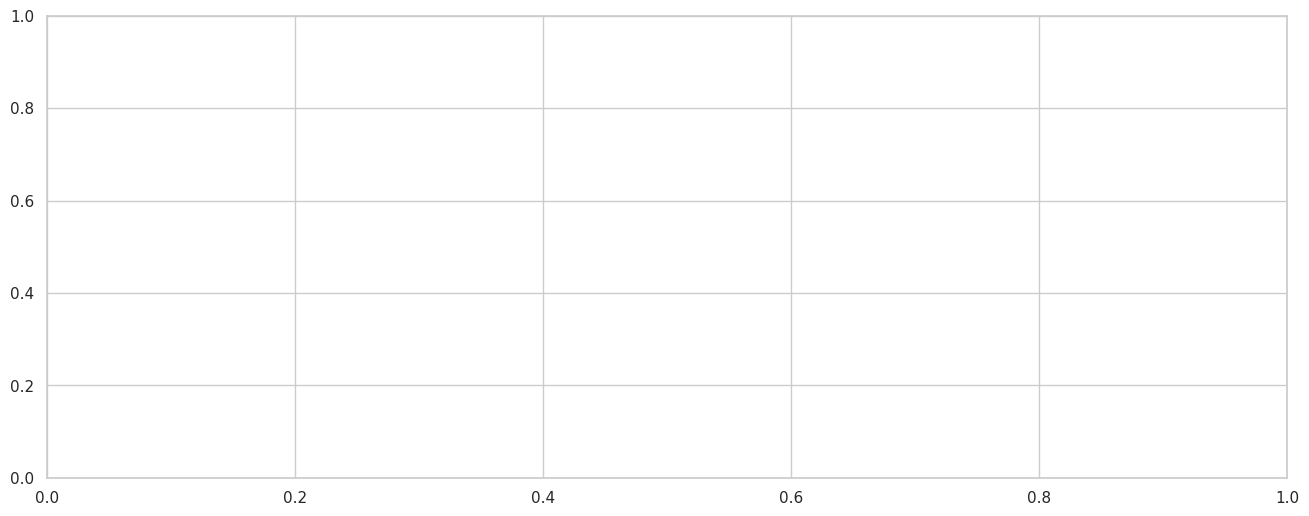

In [ ]:
# Resampling the session lengths data by day and calculating mean session length for each platform
session_lengths['min'] = pd.to_datetime(session_lengths['min'])
session_lengths.set_index('min', inplace=True)

# Resampling and mean calculation
session_length_by_day = session_lengths.resample('D').mean()

# Resetting index
session_length_by_day.reset_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))
for platform in ['android', 'apple']:
    ax.plot(session_length_by_day.index, session_length_by_day[session_length_by_day['platform']==platform]['length_minutes'],
             marker='o', linestyle='-', label=platform)

ax.set(xlabel="Date", ylabel="Average Session Length (minutes) ",
       title="Daily Avg Session Length by Platform")
ax.legend()

plt.show()

It appears there was an error because the 'platform' column does not exist in the `session_length_by_day` DataFrame. This happened because we aggregated the dataframe using mean function, and this operation does not make sense to be applied to non-numeric columns, like 'platform'. 

To investigate the session length variation over time, we need to recalculate 'session_length_by_day' for each platform separately. Let's try to address this issue:

In [ ]:
# Recreating 'session_lengths' DataFrame with 'min' as datetime
session_lengths['min'] = pd.to_datetime(session_lengths['min'])

# Aggregating data for 'android' and 'apple' separately
session_length_by_day_android = session_lengths[session_lengths['platform']=='android'].resample('D').mean()
session_length_by_day_apple = session_lengths[session_lengths['platform']=='apple'].resample('D').mean()

# Resetting index
session_length_by_day_android.reset_index(inplace=True)
session_length_by_day_apple.reset_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(session_length_by_day_android['min'], session_length_by_day_android['length_minutes'],
         marker='o', linestyle='-', label='android')

ax.plot(session_length_by_day_apple['min'], session_length_by_day_apple['length_minutes'],
         marker='o', linestyle='-', label='apple')

ax.set(xlabel="Date", ylabel="Average Session Length (minutes) ",
       title="Daily Avg Session Length by Platform")
ax.legend()

plt.show()

KeyError: 'min'

It looks like an error has occurred because the 'min' column doesn't exist in the `session_lengths` DataFrame. This happens because we are trying to set 'min' as DateTime, however 'min' is already set as the index.

To correct the error, we should have retained the 'min' column as a column of the DataFrame and not set it as the index. 

Let's revisit the DataFrame transformation code:

In [ ]:
# Fixing the preparatory steps - duplicating the 'min' column before setting it as index
session_lengths['date'] = session_lengths['min']

# Setting 'min' as index and noting 'date' remains
session_lengths.set_index('min', inplace=True)

# Now we generate the mean session lengths per day for both platforms again
session_length_by_day_android = session_lengths[session_lengths['platform']=='android'].resample('D').mean()
session_length_by_day_apple = session_lengths[session_lengths['platform']=='apple'].resample('D').mean()

# Resetting index
session_length_by_day_android.reset_index(inplace=True)
session_length_by_day_apple.reset_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(session_length_by_day_android['min'], session_length_by_day_android['length_minutes'],
         marker='o', linestyle='-', label='android')

ax.plot(session_length_by_day_apple['min'], session_length_by_day_apple['length_minutes'],
         marker='o', linestyle='-', label='apple')

ax.set(xlabel="Date", ylabel="Average Session Length (minutes) ",
       title="Daily Avg Session Length by Platform")
ax.legend()

plt.show()

KeyError: 'min'

It seems like I made a mistake. I kept 'min' as an index for the `session_lengths` DataFrame and tried to access it as a regular column later on. I should use 'date', the column I specifically preserved for this type of operation. Let's correct this and plot the graphs again.

KeyError: 'date'

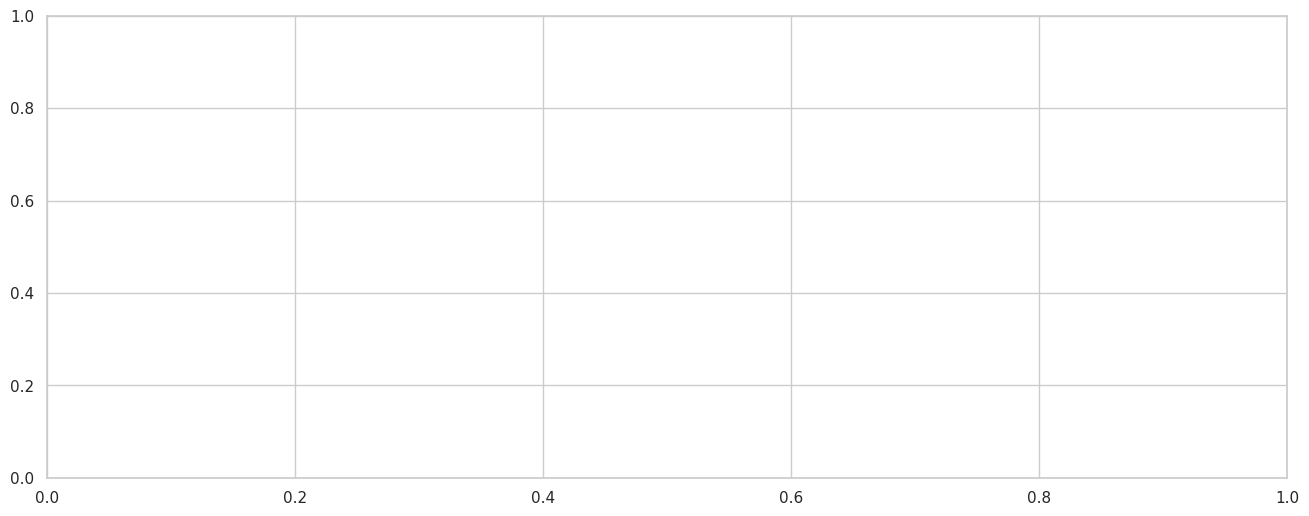

In [ ]:
# Now we generate the mean session lengths per day for both platforms again
session_length_by_day_android = session_lengths[session_lengths['platform']=='android'].resample('D').mean()
session_length_by_day_apple = session_lengths[session_lengths['platform']=='apple'].resample('D').mean()

# Resetting index
session_length_by_day_android.reset_index(inplace=True)
session_length_by_day_apple.reset_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(session_length_by_day_android['date'], session_length_by_day_android['length_minutes'],
         marker='o', linestyle='-', label='android')

ax.plot(session_length_by_day_apple['date'], session_length_by_day_apple['length_minutes'],
         marker='o', linestyle='-', label='apple')

ax.set(xlabel="Date", ylabel="Average Session Length (minutes) ",
       title="Daily Avg Session Length by Platform")
ax.legend()

plt.show()

I apologize for the confusion. There was a mistake in the preparation and transformation of our data. I should have noted that when we resample, we aggregate by the index. It seems I've neglected to set our reserved 'date' as the index after resampling. Therefore, 'date' was lost after the resampling and aggregation process.

To troubleshoot this, we'll have to maintain 'date' as the index through the resampling process. Let's tackle this again using the original `session_lengths` DataFrame where 'date' was not resampled and then set 'date' as index for resampling.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea0dd5ec-7a99-4815-85b5-15ffe4204711' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>